In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Print the image with fiducial markers. 

In [58]:
def show(index):
    path = 'train_set/points/000' + str(index) + '.mat'
    mat = scipy.io.loadmat(path)['faceCoordinatesUnwarped']
    path = 'train_set/images/000' + str(index) + '.jpg'
    pic = plt.imread(path)
    
    x = []
    y = []
    z = range(len(mat))
    
    for i in z:
        x.append(mat[0:][i][0])
        y.append(mat[0:][i][1])
    
    fig, ax = plt.subplots(figsize = (15,15))
    ax.scatter(x,y)

    # add annotation
    for i, txt in enumerate(z):
        ax.annotate(txt, (x[i], y[i]))

    # the original image
    ax.imshow(pic)

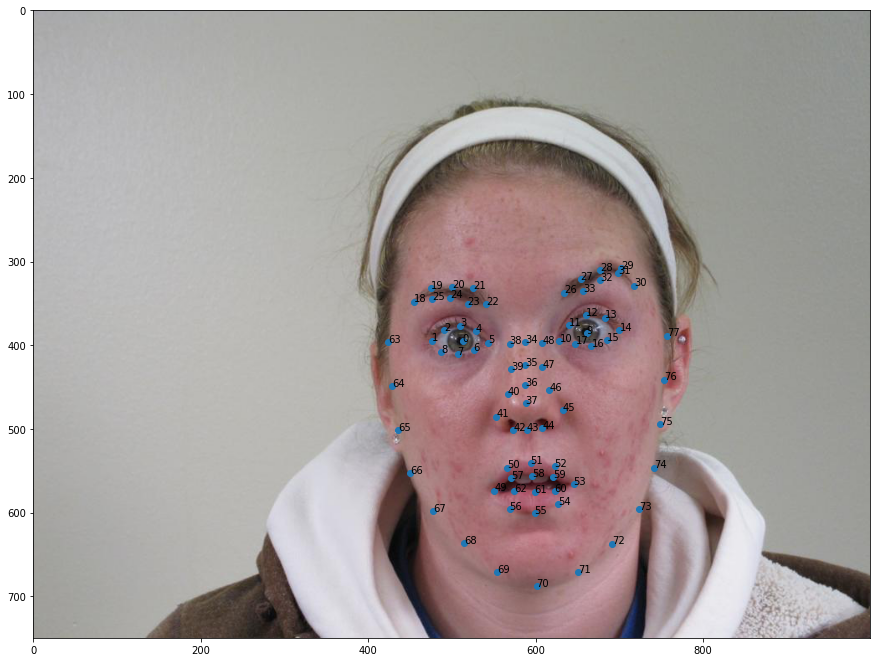

In [61]:
show(1)

There are 77 points for each image. And the points can be roughly classified into five parts: face, eyes, eyebrows, lips and nose. Referencing [this paper](https://arxiv.org/pdf/1902.01019.pdf), which explain the important regions for different emotions. From fig.12 and fig.13 we know that eyes, lips, eyeborws lead to different facial expressions. This make sense as nose and face will always remain the same for facial experssions.

Implementing the conclusion, we suggest to keep points for eyebrows, eyes and lips. The indices for the three groups will be:

In [126]:
chosen = list(z)[0:34] + list(z)[49:63]
len(chosen)

48

In [124]:
# the updated plots
def show_new(index):
    path = 'train_set/points/000' + str(index) + '.mat'
    mat = scipy.io.loadmat(path)['faceCoordinatesUnwarped'][chosen]
    path = 'train_set/images/000' + str(index) + '.jpg'
    pic = plt.imread(path)
    
    x = []
    y = []
    z = range(len(mat))
    
    for i in z:
        x.append(mat[0:][i][0])
        y.append(mat[0:][i][1])

    fig, ax = plt.subplots(figsize = (15,15))
    ax.scatter(x,y)

    # add annotation
    for i, txt in enumerate(z):
        ax.annotate(txt, (x[i], y[i]))

    # the original image
    ax.imshow(pic)

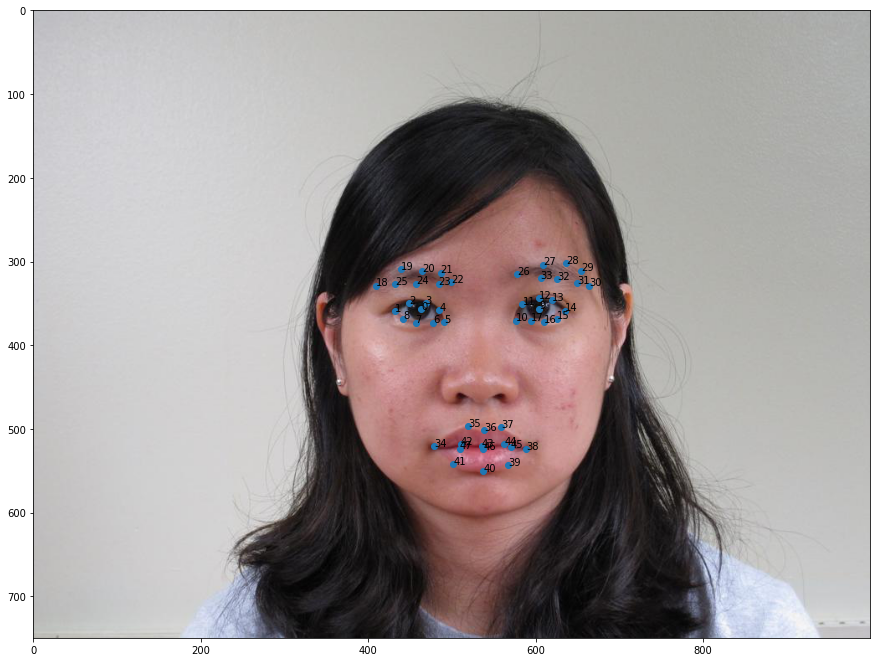

In [128]:
show_new(2)

The feature is narrowed from 78 to 48.

Notice that the left and right parts of the face would always have same tendency. What about just keep one side of it?

In [127]:
for i in range(49,63):
    print(i)

49
50
51
52
53
54
55
56
57
58
59
60
61
62
